
# Week 1 – ML Fundamentals: `ml_basics.ipynb`

This notebook is part of the **AI Architect Portfolio – Week 1**.

Goals:

- Refresh core **supervised machine learning** concepts.
- Implement simple **regression** and **classification** models with scikit-learn.
- Practice **train/validation/test splits** and **evaluation metrics**.
- Produce plots you can show in interviews and in your GitHub portfolio.


## 0. Setup

In [ ]:

# Core imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
%matplotlib inline



## 1. Load Sample Datasets

We will use built-in datasets from scikit-learn:

- A **regression** target (diabetes dataset)
- A **classification** target (breast cancer dataset)


In [2]:

from sklearn.datasets import load_diabetes, load_breast_cancer

# Regression dataset (diabetes)
diabetes = load_diabetes(as_frame=True)
df_reg = diabetes.frame  # features + target
display(df_reg.head())

# Classification dataset (breast cancer)
breast = load_breast_cancer(as_frame=True)
df_clf = breast.frame
display(df_clf.head())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



## 2. Regression: Linear Regression

Steps:

1. Split into train/test sets  
2. Fit a **Linear Regression** model  
3. Evaluate with **MSE** and **R²**  
4. Plot Actual vs Predicted


In [3]:

from sklearn.linear_model import LinearRegression

# --- Prepare data ---
X_reg = df_reg.drop(columns=["target"])
y_reg = df_reg["target"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# --- Train model ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# --- Predict ---
y_pred_reg = lin_reg.predict(X_test_reg)

# --- Evaluate ---
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MSE: {mse:.3f}")
print(f"R² : {r2:.3f}")


MSE: 2900.194
R² : 0.453


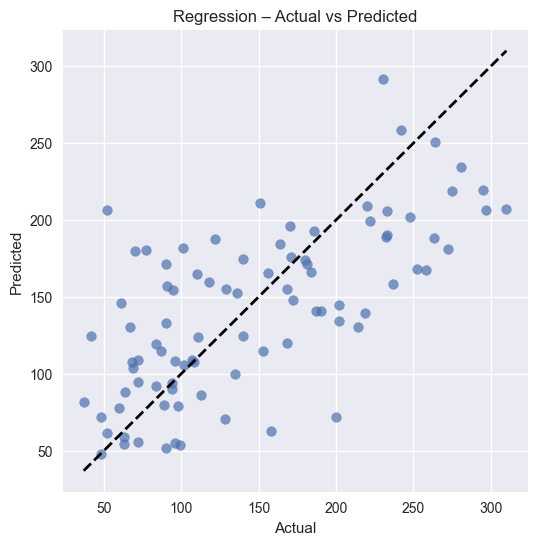

In [4]:

# Plot Actual vs Predicted

plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regression – Actual vs Predicted")
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         "k--", lw=2)
plt.show()


In [8]:
# 🔁 Compare Linear vs Ridge (regularization)
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, random_state=42).fit(X_train_reg, y_train_reg)

print("Linear R²:", r2_score(y_test_reg, y_pred_reg))
print("Ridge  R²:", r2_score(y_test_reg, ridge.predict(X_test_reg)))


Linear R²: 0.4526027629719195
Ridge  R²: 0.41915292635986556



### 2.1 Try Regularization (Optional)

As an extra experiment, try **Ridge** or **Lasso** regression and compare scores.


In [ ]:

# TODO: Implement Ridge / Lasso and compare performance



## 3. Classification: Decision Tree

Steps:

1. Split into train/test sets  
2. Fit a **Decision Tree** model  
3. Evaluate with **accuracy, precision, recall, F1**  
4. Plot a **confusion matrix**


In [5]:

from sklearn.tree import DecisionTreeClassifier

# --- Prepare data ---
X_clf = df_clf.drop(columns=["target"])
y_clf = df_clf["target"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# --- Train model ---
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train_clf, y_train_clf)

# --- Predict ---
y_pred_clf = tree.predict(X_test_clf)

# --- Evaluate ---
print("Accuracy :", accuracy_score(y_test_clf, y_pred_clf))
print("Precision:", precision_score(y_test_clf, y_pred_clf))
print("Recall   :", recall_score(y_test_clf, y_pred_clf))
print("F1 Score :", f1_score(y_test_clf, y_pred_clf))

print("\nClassification Report:\n")
print(classification_report(y_test_clf, y_pred_clf))


Accuracy : 0.9385964912280702
Precision: 0.9577464788732394
Recall   : 0.9444444444444444
F1 Score : 0.951048951048951

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



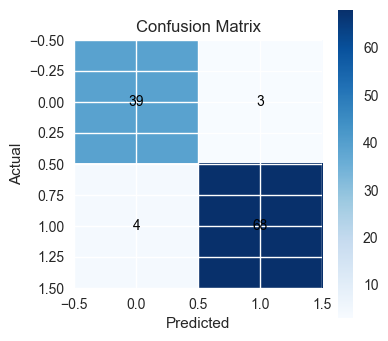

In [6]:

# Confusion Matrix

cm = confusion_matrix(y_test_clf, y_pred_clf)

fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(cm, cmap="Blues")

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar(im, ax=ax)
plt.show()


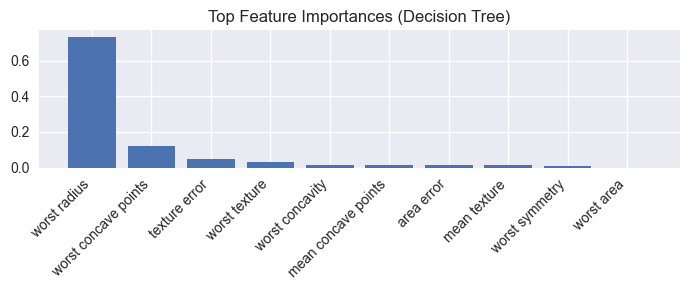

[('worst radius', np.float64(0.733547574075133)),
 ('worst concave points', np.float64(0.12202752123878562)),
 ('texture error', np.float64(0.04578469013555809)),
 ('worst texture', np.float64(0.0323192601862405)),
 ('worst concavity', np.float64(0.017161164925591495))]

In [9]:
# 📊 Decision Tree feature importances (top 10)
import numpy as np

imps = tree.feature_importances_
idx  = np.argsort(imps)[-10:][::-1]  # indices of top 10

plt.figure(figsize=(7,3))
plt.bar(range(len(idx)), imps[idx])
plt.xticks(range(len(idx)), X_clf.columns[idx], rotation=45, ha="right")
plt.title("Top Feature Importances (Decision Tree)")
plt.tight_layout()
# plt.savefig("../plots/tree_feature_importances.png", dpi=150, bbox_inches="tight")
plt.show()

list(zip(X_clf.columns[idx], imps[idx]))[:5]  # show top few in text



## 4. Cross-Validation & Model Complexity (Bias–Variance Intuition)

Use cross-validation to get a more stable estimate of performance and see how model complexity affects results.


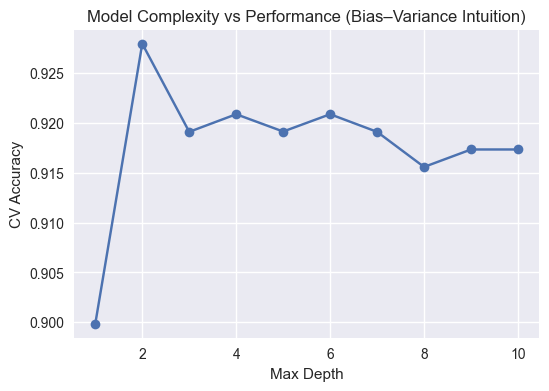

In [7]:

# Example: cross-validation accuracy for different tree depths

depths = range(1, 11)
cv_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(model, X_clf, y_clf, cv=5)
    cv_scores.append(scores.mean())

plt.figure(figsize=(6, 4))
plt.plot(depths, cv_scores, marker="o")
plt.xlabel("Max Depth")
plt.ylabel("CV Accuracy")
plt.title("Model Complexity vs Performance (Bias–Variance Intuition)")
plt.show()



## 5. Summary (for README / Interview)

In your own words, summarize:

- What datasets you used  
- Which models you trained  
- Which metrics you looked at  
- Any observations about overfitting / underfitting  
- What you’d try next (e.g. more features, different models, hyperparameter tuning)

You can later copy parts of this summary into your project README or interview prep notes.
